In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dvalues=pd.read_csv("dvalues.csv")

In [28]:
dates=dvalues.columns[1:]
count=dvalues.T.columns

In [34]:
dvalues=dvalues.T
for i in range(10714):
    dvalues[i]=dvalues[i].apply(lambda x: int(x.replace(',','')) if type(x)==str else int(x))

people_ID       1
20-Mar-20     441
21-Mar-20     544
22-Mar-20     670
23-Mar-20     821
24-Mar-20    1002
25-Mar-20    1216
26-Mar-20    1473
Name: 0, dtype: int64

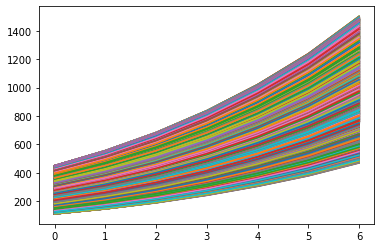

In [41]:
for i in range(10000):
    plt.plot(dvalues[i].values[1:])

## Conclusion: Almost linear

In [42]:
data=dvalues[0][1:]

In [67]:
y1=np.log(data).reshape(-1,1)
y2=np.sqrt(data).reshape(-1,1)
from sklearn.linear_model import LinearRegression

In [68]:
x=np.arange(1,8).reshape(-1,1)
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [72]:
def rmse(a,b):
    return np.sqrt(np.mean(np.square(a-b)))
def rsq(prediction,y):
    SST = np.sum(np.square(y - np.mean(y)))
    SSReg = np.sum(np.square(prediction - np.mean(y)))
    Rsquared = SSReg/SST
    return Rsquared

In [81]:
model=LinearRegression()
model.fit(x,y1)
print('log:',rsq(model.predict(x),y1))
#model.fit(x,y2)
#print('sqrt:',rsq(model.predict(x),y2))

log: 0.9996845252458113


In [82]:
model.predict(np.array([8]).reshape(-1,1))

array([[7.50616893]])

It appears log transform works slightly better than sqrt hence i'll use it to make predictions

In [85]:
def prediction(data):
    data=data.values
    y1=np.log(data).reshape(-1,1)
    x=np.arange(1,8).reshape(-1,1)
    model=LinearRegression()
    model.fit(x,y1)
    return int(np.exp(model.predict(np.array([8]).reshape(-1,1))))

In [86]:
#Making predictions
forecast=[]
for i in range(10714):
    forecast.append(prediction(dvalues[i][1:]))

In [88]:
dvalues=dvalues.T

In [90]:
forecasted_data=pd.concat([dvalues,pd.DataFrame(forecast,columns=['forecasts'])],axis=1)

In [91]:
forecasted_data.to_csv('forecasted_data.csv',index=False)